<a href="https://colab.research.google.com/github/AnoopG24/Python_projects/blob/main/Morningstar_UVportfolio_tracker1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [2]:
# Portfolio creation
# i have picked a total of 10 stocks that are considered as undervalued based on "Morningstar" Q1 2026 rating
# in this case i will be investing a total of $10000 on the custom undervalued portfolio and will also be investing the same in the S&P 500 and the relative index these stocks are part of
# date 1/16/2026
# mode of operation- will be investing $1000 dollors on each stock

In [3]:
ticker=['AVGO','MSFT','BKR','DVN','SLB','ELV','GEHC','IQV','BR','LPLA']

In [4]:
df=yf.download(ticker,start='2026-01-16')['Close']
df1 = df.reset_index().melt(id_vars=['Date'], var_name='Ticker', value_name='Close')

/tmp/ipython-input-3639501924.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start='2026-01-16')['Close']
[*********************100%***********************]  10 of 10 completed


In [5]:
df1

,Date,Ticker,Close
0,2026-01-16,AVGO,351.709991
1,2026-01-16,BKR,51.750000
2,2026-01-16,BR,218.639999
3,2026-01-16,DVN,36.200001
4,2026-01-16,ELV,374.869995
5,2026-01-16,GEHC,81.750000
6,2026-01-16,IQV,237.679993
7,2026-01-16,LPLA,378.619995
8,2026-01-16,MSFT,459.859985
9,2026-01-16,SLB,46.730000


In [6]:
df1=df1.drop('Date',axis=1)

In [7]:
df1

,Ticker,Close
0,AVGO,351.709991
1,BKR,51.750000
2,BR,218.639999
3,DVN,36.200001
4,ELV,374.869995
5,GEHC,81.750000
6,IQV,237.679993
7,LPLA,378.619995
8,MSFT,459.859985
9,SLB,46.730000


In [8]:
df1.columns=['Ticker','Close_P0']
df1['Quantity']=1000/df1['Close_P0']
sum=df1['Quantity'].sum()
df1['Weights']=df1['Quantity']/sum
df1['Weights%']=df1['Weights']*100

In [9]:
df1

,Ticker,Close_P0,Quantity,Weights,Weights%
0,AVGO,351.709991,2.843252,0.028522,2.852162
1,BKR,51.750000,19.323671,0.193842,19.384232
2,BR,218.639999,4.573729,0.045881,4.588063
3,DVN,36.200001,27.624309,0.277109,27.710883
4,ELV,374.869995,2.667591,0.026760,2.675952
5,GEHC,81.750000,12.232416,0.122708,12.270752
6,IQV,237.679993,4.207338,0.042205,4.220523
7,LPLA,378.619995,2.641171,0.026494,2.649448
8,MSFT,459.859985,2.174575,0.021814,2.181390
9,SLB,46.730000,21.399529,0.214666,21.466595


<Axes: title={'center': 'Portfolio Weights'}, xlabel='Ticker'>

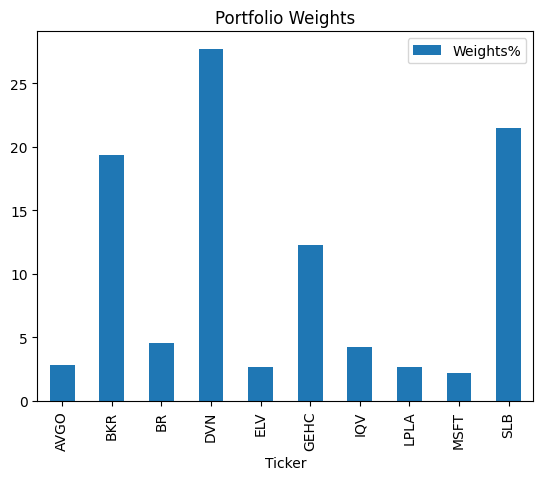

In [10]:
df1.plot(kind='bar',x='Ticker',y='Weights%',title='Portfolio Weights')

In [11]:
# current Date price tracker coded as ff

In [12]:
nv=yf.download(ticker,period='1d')['Close']

/tmp/ipython-input-677456343.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nv=yf.download(ticker,period='1d')['Close']
[*********************100%***********************]  10 of 10 completed


In [13]:
new_nv=nv.reset_index().melt(id_vars=['Date'], var_name='Ticker', value_name='Close')
new_nv.drop('Date', axis=1, inplace=True)
display(new_nv)




,Ticker,Close
0,AVGO,351.709991
1,BKR,51.750000
2,BR,218.639999
3,DVN,36.200001
4,ELV,374.869995
5,GEHC,81.750000
6,IQV,237.679993
7,LPLA,378.619995
8,MSFT,459.859985
9,SLB,46.730000


In [14]:
cct=pd.merge(df1,new_nv,on='Ticker')

In [15]:
cct.round(2)

,Ticker,Close_P0,Quantity,Weights,Weights%,Close
0,AVGO,351.71,2.84,0.03,2.85,351.71
1,BKR,51.75,19.32,0.19,19.38,51.75
2,BR,218.64,4.57,0.05,4.59,218.64
3,DVN,36.20,27.62,0.28,27.71,36.20
4,ELV,374.87,2.67,0.03,2.68,374.87
5,GEHC,81.75,12.23,0.12,12.27,81.75
6,IQV,237.68,4.21,0.04,4.22,237.68
7,LPLA,378.62,2.64,0.03,2.65,378.62
8,MSFT,459.86,2.17,0.02,2.18,459.86
9,SLB,46.73,21.40,0.21,21.47,46.73


In [16]:
cct1=cct

In [17]:
cct1['value']=cct1['Close_P0']*cct1['Quantity']
cct1['Change']=cct1['Close_P0']-cct1['Close']
cct1['Change%']=cct1['Change']/cct1['Close_P0']*100
cct1['update_value']=cct1['Close']*cct1['Quantity']
cct['net_change']=cct1['update_value']-cct1['value']

In [18]:
cct1.round(2)

,Ticker,Close_P0,Quantity,Weights,Weights%,Close,value,Change,Change%,update_value,net_change
0,AVGO,351.71,2.84,0.03,2.85,351.71,1000.0,0.0,0.0,1000.0,0.0
1,BKR,51.75,19.32,0.19,19.38,51.75,1000.0,0.0,0.0,1000.0,0.0
2,BR,218.64,4.57,0.05,4.59,218.64,1000.0,0.0,0.0,1000.0,0.0
3,DVN,36.20,27.62,0.28,27.71,36.20,1000.0,0.0,0.0,1000.0,0.0
4,ELV,374.87,2.67,0.03,2.68,374.87,1000.0,0.0,0.0,1000.0,0.0
5,GEHC,81.75,12.23,0.12,12.27,81.75,1000.0,0.0,0.0,1000.0,0.0
6,IQV,237.68,4.21,0.04,4.22,237.68,1000.0,0.0,0.0,1000.0,0.0
7,LPLA,378.62,2.64,0.03,2.65,378.62,1000.0,0.0,0.0,1000.0,0.0
8,MSFT,459.86,2.17,0.02,2.18,459.86,1000.0,0.0,0.0,1000.0,0.0
9,SLB,46.73,21.40,0.21,21.47,46.73,1000.0,0.0,0.0,1000.0,0.0


<Axes: xlabel='Ticker'>

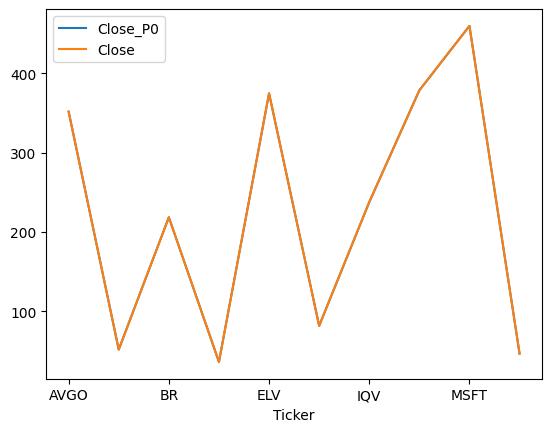

In [28]:
cct1.plot(kind='line',x='Ticker',y=['Close_P0','Close'])

Portfolio value represent the amount that is being invested in this case a sum of 1000 invested across 10 stocks


In [19]:
portfolio_value=cct1['update_value'].sum()
print(portfolio_value)

10000.0


In [20]:
#Index portfolio

In [21]:
tickers = {
    'S&P 500': '^GSPC',
    'Tech Index': '^NDXT'
}


idf=yf.download(list(tickers.values()), start='2026-01-16')['Close']

/tmp/ipython-input-1989923122.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  idf=yf.download(list(tickers.values()), start='2026-01-16')['Close']
[*********************100%***********************]  2 of 2 completed


In [22]:
idf
idf1 = idf.reset_index().melt(id_vars=['Date'], var_name='Ticker', value_name='Close')

In [23]:
idf1['']

KeyError: ''